# Installing Required Packages

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8a/bf/9e3f10e55df30b0fb4bf6c2ee7d50bda2e070599b86f62ea3f9954af172b/keras-3.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
    --------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.2 MB 656.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.2 MB 804.6 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.2 MB 1.9 MB/s eta 0:00:01
   --------------------------------- ------ 1.0/1.2 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.7.0 which is incompatible.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.4.1 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.18.0 which is incompatible.


In [28]:
pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/69/55/ce836703ff77bb21582c3098d5311f8ddde7eadc7eab04be9561961f4725/torchvision-0.20.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/32/6a/019e426ab4af487167182a19e115fc03234fe28bc30e22cb0e1a9958f70e/torchaudio-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.7.0 which is incompatible.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.4.1 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.18.0 which is incompatible.


# Importing Required Packages

In [1]:
import kagglehub

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential

In [4]:
pip show tensorflow-intel

Name: tensorflow-intel
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\hp\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tensorflow
Note: you may need to restart the kernel to use updated packages.


# Downloading the latest dataset using API and loading it into dataframe

In [5]:
# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

In [6]:
# Path to dataset
data_dir = r"C:\Users\hp\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2\chest_xray\test"
categories = ["NORMAL", "PNEUMONIA"]

In [7]:
# Load and resize images
data = []
labels = []
img_size = 128

for category in categories:
    folder_path = os.path.join(data_dir, category)
    label = categories.index(category)  # 0: NORMAL, 1: PNEUMONIA
    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append(resized_arr)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image: {e}")

data = np.array(data) / 255.0  # Normalize images
labels = np.array(labels)

### Splitting the dataset into 80% train and 20% test size 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Checking the first five images in train dataset 

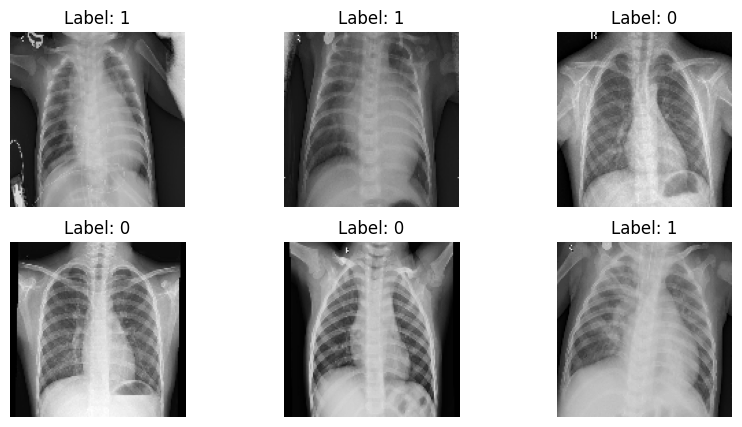

In [9]:
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')
plt.show()

## Building the GAN Model

In [10]:
#Building the model generator

def build_generator(latent_dim):
    model = Sequential([
        Dense(64 * 16 * 16, input_dim=latent_dim, activation="relu"),
        Reshape((16, 16, 64)),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", activation="relu"),  # Upscale to 32x32
        Conv2DTranspose(32, kernel_size=4, strides=2, padding="same", activation="relu"),  # Upscale to 64x64
        Conv2DTranspose(16, kernel_size=4, strides=2, padding="same", activation="relu"),  # Upscale to 128x128
        Conv2DTranspose(1, kernel_size=3, strides=1, padding="same", activation="sigmoid") # Output 128x128x1
    ])
    return model

latent_dim = 100
generator = build_generator(latent_dim)
generator.summary()

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 64)     │        65,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 64, 64, 32)     │        32,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 128, 128, 16)   │         8,208 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 128, 128, 1)    │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,761,537 (6.72 MB)

 Trainable params: 1,761,537 (6.72 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Building the model discriminator

def build_discriminator(img_shape=(128, 128, 1)):
    model = Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=img_shape),
        LeakyReLU(0.2),
        Flatten(),
        Dense(1, activation="sigmoid")
    ])
    return model

discriminator = build_discriminator()
discriminator.summary()

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       262,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,233 (1.00 MB)

 Trainable params: 263,233 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the GAN Model

In [12]:
img_shape = (128, 128, 1)
latent_dim = 100

generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)

discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss="binary_crossentropy", metrics=["accuracy"])

discriminator.trainable = False  # Freeze discriminator for GAN training
gan_input = tf.keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss="binary_crossentropy")

### Building the train function to train the GAN model

In [13]:
def train_gan(generator, discriminator, gan, X_train, epochs=1000, batch_size=16):
    # Labels for real and fake images
    real_label = np.ones((batch_size, 1))
    fake_label = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_imgs = X_train[idx]  # Real images from the dataset

        # Generate fake images
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_imgs = generator.predict(noise)

        # Train the discriminator with real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs, real_label)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_label)

        # Train the generator via the GAN
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, real_label)

        # Log progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: D Loss (Real): {d_loss_real[0]}, D Loss (Fake): {d_loss_fake[0]}, G Loss: {g_loss}")

#### resizing the train model for better performance  

In [14]:
from cv2 import resize

# Resize images to 128x128 and normalize
X_train_resized = np.array([resize(img, (128, 128)) for img in X_train])
X_train_resized = X_train_resized.reshape((-1, 128, 128, 1)) / 255.0

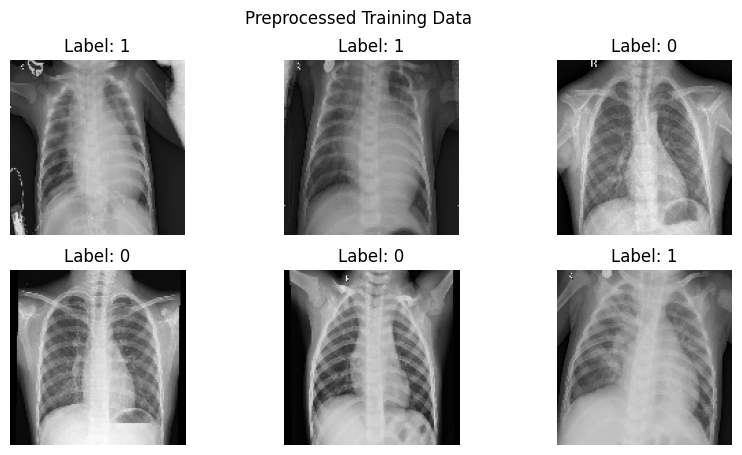

In [15]:
# Checking top 6 images of the resized train data 

def plot_images(images, labels, title="Sample Images"):
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(X_train_resized[:6], y_train[:6], title="Preprocessed Training Data")

In [16]:
#Printing the shape of the generator, discriminator and resized train data to check if everything is in the same size

print(f"Generator Output Shape: {generator.output_shape}")
print(f"Discriminator Input Shape: {discriminator.input_shape}")
print(f"Training Data Shape: {X_train_resized.shape}")

Generator Output Shape: (None, 128, 128, 1)
Discriminator Input Shape: (None, 128, 128, 1)
Training Data Shape: (499, 128, 128, 1)


In [17]:
generator = build_generator(latent_dim)
discriminator = build_discriminator()
gan = tf.keras.Model(gan_input, gan_output)

# Recompile all models
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), 
            loss='binary_crossentropy')

# Restart training
train_gan(generator, discriminator, gan, X_train_resized, epochs=1000, batch_size=16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Epoch 0: D Loss (Real): 0.6930986642837524, D Loss (Fake): 1.5856575965881348, G Loss: 0.8182068467140198
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━

## Generating Synthetic Images:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


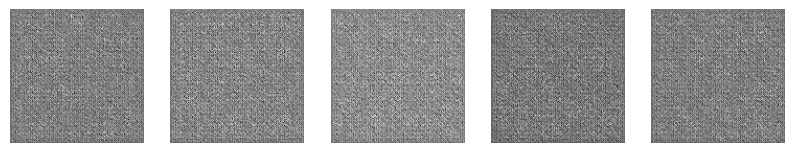

In [18]:
noise = np.random.normal(0, 1, (5, latent_dim))
synthetic_images = generator.predict(noise)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(synthetic_images[i].reshape(128, 128), cmap='gray')
    plt.axis('off')
plt.show()

## Train a Classifier:

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.5981 - loss: 2.5771 - val_accuracy: 0.6000 - val_loss: 1.6423
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.6907 - loss: 0.8803 - val_accuracy: 0.7600 - val_loss: 0.5439
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8683 - loss: 0.2982 - val_accuracy: 0.9360 - val_loss: 0.2011
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9188 - loss: 0.2027 - val_accuracy: 0.9440 - val_loss: 0.1848
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9543 - loss: 0.1463 - val_accuracy: 0.9440 - val_loss: 0.1676
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9764 - loss: 0.0962 - val_accuracy: 0.9040 - val_loss: 0.2345
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9758 - loss: 0.1018 - val_accuracy: 0.9280 - val_loss: 0.1731
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9882 - loss: 0.0731 - val_accuracy: 0.

## Evaluate the Model:

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9286 - loss: 0.1853
Test Accuracy: 94.40%


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


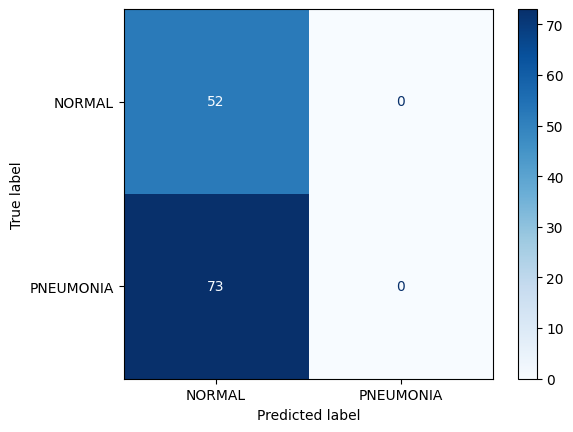

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA"])
disp.plot(cmap='Blues')
plt.show()

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Use `y_pred` directly
roc_auc = auc(fpr, tpr)

In [23]:
print(y_pred.shape)

(125, 1)


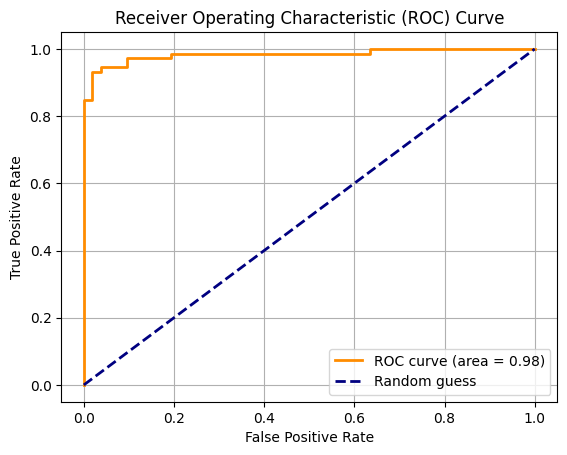

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # `y_pred_probs` is for the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


                                                   ---- The END -----